In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import StandardScaler


%store -r X_features_full
%store -r X_features_poly_full
%store -r y_labels_full


%store -r totaldf_full
totaldf = totaldf_full
X_features = X_features_full
X_features_poly = X_features_poly_full
y_labels = y_labels_full

In [2]:
svm_lin_reg = joblib.load("svm_lin_reg.pkl")
optimized_svm_regressor = joblib.load("optimized_svm_regressor.pkl")
_randomly_optimized_svm_regressor = joblib.load("_randomly_optimized_svm_regressor.pkl")
svm_poly_reg = joblib.load("svm_poly_reg.pkl")
svm_rbf_reg = joblib.load("svm_rbf_reg.pkl")
svm_rbf_poly_reg = joblib.load("svm_rbf_poly_reg.pkl")
svm_poly2_reg = joblib.load('svm_poly2_reg.pkl')
svm_poly3_reg = joblib.load('svm_poly3_reg.pkl')

In [3]:
totaldf.insert(7,'lin svm μ',totaldf.μob*(np.exp(np.power(svm_lin_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(8,'optimized svm μ', totaldf.μob*(np.exp(np.power(optimized_svm_regressor.predict(X_features[2]),2)) -0.0012))
totaldf.insert(9,'random optimized svm μ', totaldf.μob*(np.exp(np.power(_randomly_optimized_svm_regressor.predict(X_features[2]),2)) -0.0012))
totaldf.insert(10,'poly features lin svm μ', totaldf.μob*(np.exp(np.power(svm_poly_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(11,'poly lasso μ', totaldf.μob*(np.exp(np.power(svm_rbf_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(12,'svm rbf poly  μ', totaldf.μob*(np.exp(np.power(svm_rbf_poly_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(13,'svm poly reg 2 μ', totaldf.μob*(np.exp(np.power(svm_poly2_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(14,'svm poly reg 3 μ', totaldf.μob*(np.exp(np.power(svm_poly3_reg.predict(X_features[2]),2)) -0.0012))


In [4]:
totaldf

,Pb,P,ΔP,μob,μ,Rsob,API,lin svm μ,optimized svm μ,random optimized svm μ,poly features lin svm μ,poly lasso μ,svm rbf poly μ,svm poly reg 2 μ,svm poly reg 3 μ,Tr
0,2200.008903,2200.008903,0.000000,0.998677,0.998677,478.607857,32.545608,0.998093,0.999036,1.005346,0.998573,0.998695,0.998746,0.998624,0.998887,336.150
1,2200.008903,2348.166747,148.157844,0.998677,1.007916,478.607857,32.545608,1.014132,1.011459,1.013245,1.012556,1.011158,1.010997,1.024691,1.042204,336.150
2,2200.008903,2496.324590,296.315687,0.998677,1.017489,478.607857,32.545608,1.027296,1.024467,1.026370,1.024745,1.023069,1.023389,1.039241,1.066528,336.150
3,2200.008903,2644.482434,444.473531,0.998677,1.027342,478.607857,32.545608,1.040093,1.038075,1.037890,1.037121,1.036008,1.036480,1.050280,1.081383,336.150
4,2200.008903,2792.640278,592.631375,0.998677,1.037429,478.607857,32.545608,1.052760,1.051466,1.048963,1.049689,1.049845,1.050044,1.059394,1.089778,336.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,3910.006923,5560.005012,1649.998089,0.125500,0.155127,3225.532905,42.548239,0.139534,0.152609,0.155293,0.148303,0.146711,0.143278,0.147991,0.140135,365.928
16,3910.006923,5670.004885,1759.997962,0.125500,0.157136,3225.532905,42.548239,0.140453,0.154044,0.156597,0.150169,0.148145,0.144771,0.149551,0.140714,365.928
17,3910.006923,5780.004758,1869.997835,0.125500,0.159149,3225.532905,42.548239,0.141375,0.155413,0.157753,0.152077,0.149590,0.146334,0.151154,0.141331,365.928
18,3910.006923,5890.004630,1979.997707,0.125500,0.161165,3225.532905,42.548239,0.142301,0.156742,0.158816,0.154029,0.151054,0.147966,0.152800,0.141996,365.928


In [5]:
def Stats_matrix(a):
    average_error = []
    standard_deviation = []
    absolute_average_error = []
    absolute_standard_deviation =[]
    for i in range(8):
        average_error.append(np.average((a.iloc[:,i+7]-a.μ)/a.μ*100))
        standard_deviation.append(np.std((a.iloc[:,i+7]-a.μ)/a.μ*100))
        absolute_average_error.append(np.average(np.absolute((a.iloc[:,i+7]-a.μ)/a.μ*100)))
        absolute_standard_deviation.append(np.std(np.absolute((a.iloc[:,i+7]-a.μ)/totaldf.μ*100)))
    statistics  = pd.DataFrame(list(zip(average_error,standard_deviation,absolute_average_error,
                                        absolute_standard_deviation)),columns = ['% AE','% Std Dev AE','%AAE','% Std Dev AAE'],index = ['Linear ',"Grid optimized",'Random Grid optimized','linear polynomial features','RBF ','RBF polynomial features','Polynomial 2nd degree ','Polynomial 3rd degree'])
    return statistics

Stats_matrix(totaldf)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Linear,-0.947762,5.008054,3.219334,3.951549
Grid optimized,-0.159815,4.599193,2.756729,3.684910
Random Grid optimized,0.382857,5.253065,3.082188,4.270994
linear polynomial features,-0.126394,6.057760,3.176513,5.159670
RBF,-0.539957,4.459092,2.752650,3.549362
RBF polynomial features,-0.589537,4.621398,2.845748,3.688712
Polynomial 2nd degree,-0.407721,10.855157,5.643382,9.281859
Polynomial 3rd degree,0.219866,10.014830,4.830367,8.775689


In [6]:
visc_0_1 = totaldf.loc[(totaldf.μob<1) & (totaldf.μob>0)]
Stats_matrix(visc_0_1)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Linear,-0.563829,4.195092,2.722629,4.230306
Grid optimized,0.578090,3.486105,2.189539,3.847379
Random Grid optimized,0.975770,4.004152,2.327227,3.891062
linear polynomial features,0.544165,4.607974,2.485525,4.007236
RBF,0.147691,3.390212,2.212194,3.957441
RBF polynomial features,0.019010,3.644186,2.354957,4.020407
Polynomial 2nd degree,0.192307,4.996299,3.612840,6.215844
Polynomial 3rd degree,0.782772,10.095172,4.051734,8.582150


In [7]:
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
Stats_matrix(visc_1_5)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Linear,-0.591181,6.149128,3.868693,83.661199
Grid optimized,-1.971578,6.124818,3.952343,91.250009
Random Grid optimized,-2.054689,6.063025,4.069090,88.685343
linear polynomial features,-2.478046,6.310844,4.087140,95.460950
RBF,-1.894110,6.034810,3.929399,88.433268
RBF polynomial features,-1.824233,6.024494,3.860537,88.430398
Polynomial 2nd degree,-5.329890,8.214251,6.986184,103.022317
Polynomial 3rd degree,-1.913612,6.924636,5.170460,85.245120


In [8]:
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
Stats_matrix(visc_5_20)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Linear,-1.238079,4.514349,2.860005,122.528522
Grid optimized,-1.230217,4.513868,2.847332,137.478535
Random Grid optimized,-0.080380,5.136761,3.573372,151.325479
linear polynomial features,-1.992996,4.951642,2.884256,157.700617
RBF,-1.716055,4.339491,2.745746,133.535823
RBF polynomial features,-1.780037,4.374797,2.734303,137.552277
Polynomial 2nd degree,-2.064802,12.356308,7.893379,548.391537
Polynomial 3rd degree,-1.614179,6.264108,4.488164,192.452471


In [9]:
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]
Stats_matrix(visc_20_plus)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Linear,-7.628399,5.122886,7.628399,1279.219967
Grid optimized,1.714420,5.544850,4.137062,904.622174
Random Grid optimized,6.238022,8.561468,7.294520,1569.511773
linear polynomial features,7.530429,12.859114,8.772572,2511.048966
RBF,-0.169508,5.672875,4.089249,880.437590
RBF polynomial features,0.293646,6.560877,4.602588,1026.011360
Polynomial 2nd degree,21.628594,31.572115,21.825946,6142.195705
Polynomial 3rd degree,8.149082,20.162794,14.871735,3364.699094


In [10]:
def UndersatErrorPlot(a):
    models =  ['linear svm',"optimized svm",'random svm','linear svm poly features','rbf svm','rbf svm poly features','polynomial svm order 2 ','polynomial svm order 3']
    b = models.index(a)
    plt.scatter((totaldf.ΔP),(totaldf.iloc[:,b+7]-totaldf.μ)/totaldf.μ*100,facecolors='none', edgecolors='b')
    plt.rcParams['figure.figsize'] = (15, 8)
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Presure-Bubble point pressure(Psia)')
    plt.ylabel('% Error')
    plt.ylabel
  

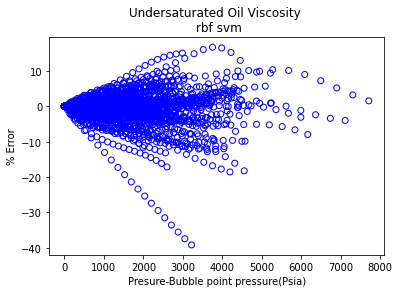

In [11]:
UndersatErrorPlot('rbf svm')

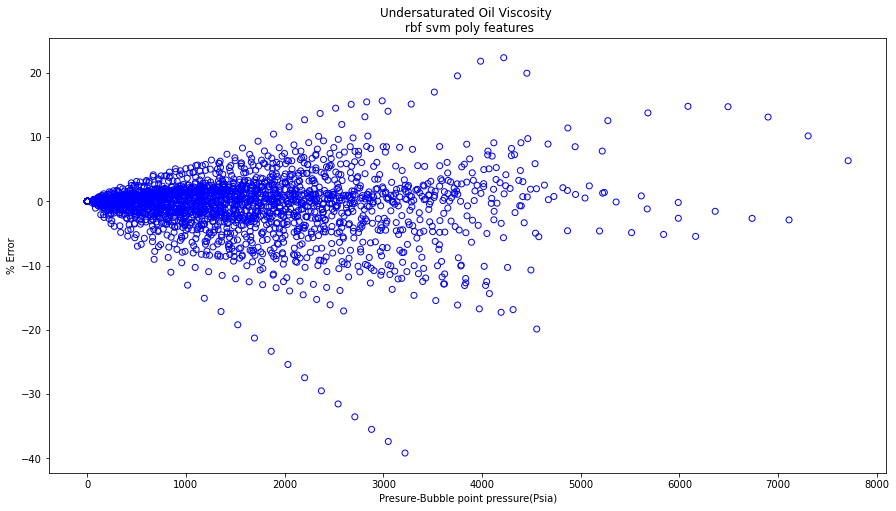

In [12]:
UndersatErrorPlot('rbf svm poly features')

In [13]:
def UndersatViscPlot(a):
    models =  ['linear svm',"optimized svm",'random svm','linear svm poly features','rbf svm','rbf svm poly features','polynomial svm order 2 ','polynomial svm order 3']
    b = models.index(a)
    plt.scatter(totaldf.μ,totaldf.iloc[:,b+7],facecolors ='none', edgecolors='b')
    plt.rcParams['figure.figsize'] = (15, 8)
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Measured Viscosity(cp)')
    plt.ylabel('Calculated Viscosity(cp)')

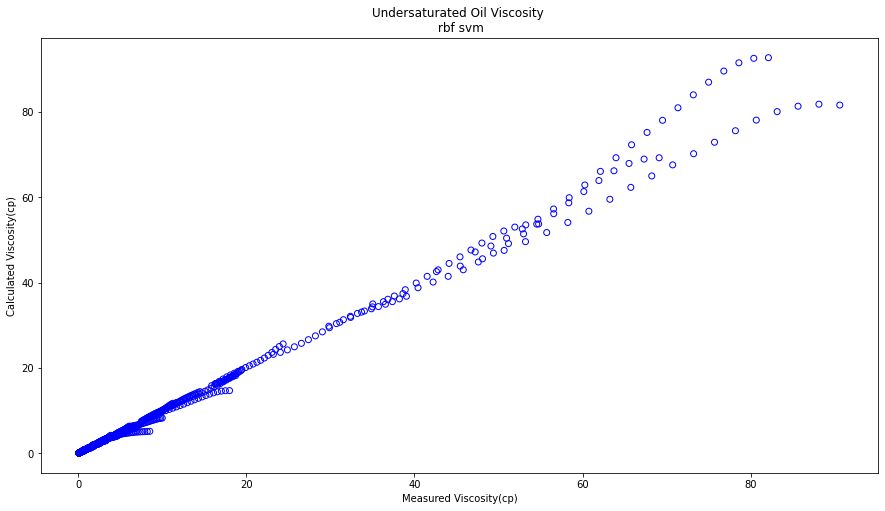

In [14]:
UndersatViscPlot('rbf svm')

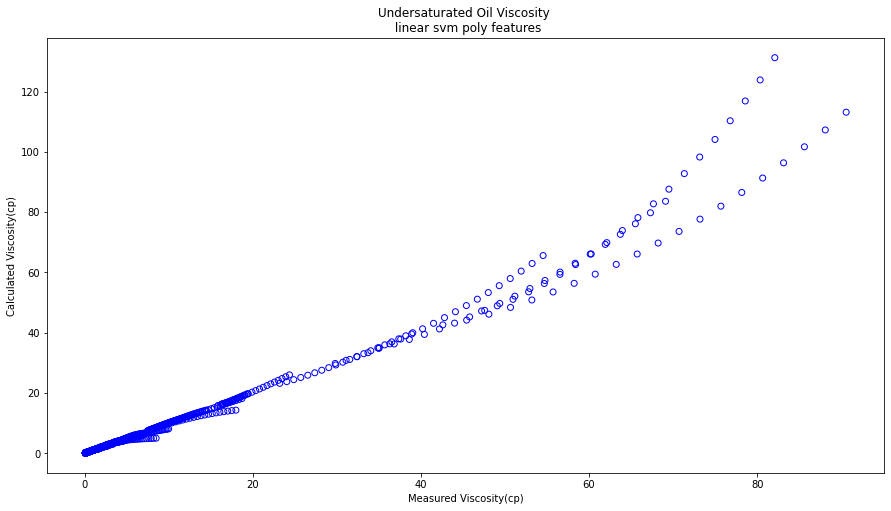

In [15]:
UndersatViscPlot('linear svm poly features')

Text(0, 0.5, '% Average Absolute Error')

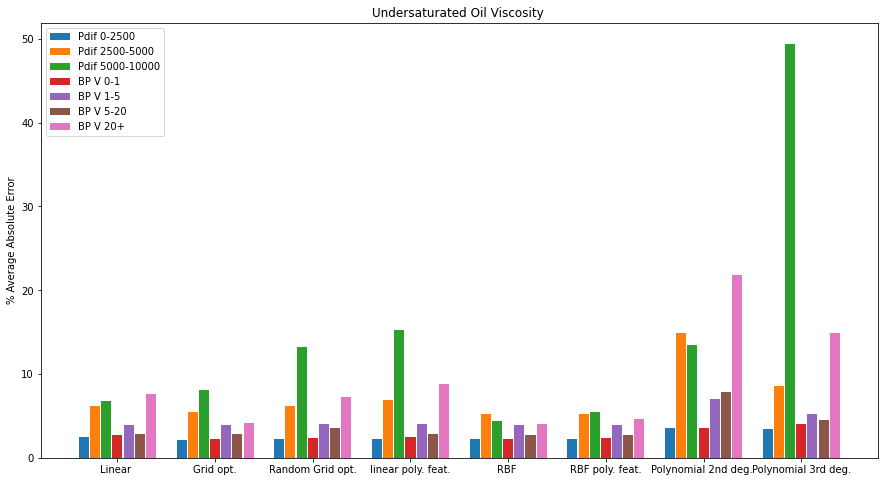

In [16]:
press_0_25 = totaldf.loc[(totaldf.ΔP<2500)]
press_25_50 = totaldf.loc[(totaldf.ΔP<5000)&(totaldf.ΔP>2500)]
press_50_100 = totaldf.loc[(totaldf.ΔP<10000)&(totaldf.ΔP>5000)]
visc_0_1 = totaldf.loc[(totaldf.μob>0) & (totaldf.μob<1)]
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]

full_data = {
    'Pdif 0-2500' : Stats_matrix(press_0_25).iloc[:,2],
    'Pdif 2500-5000' : Stats_matrix(press_25_50).iloc[:,2],
    'Pdif 5000-10000' : Stats_matrix(press_50_100).iloc[:,2],
    'BP V 0-1' : Stats_matrix(visc_0_1).iloc[:,2],
    'BP V 1-5' : Stats_matrix(visc_1_5).iloc[:,2],
    'BP V 5-20' : Stats_matrix(visc_5_20).iloc[:,2],
    'BP V 20+' : Stats_matrix(visc_20_plus).iloc[:,2],
}    
models =['Linear ',"Grid opt.",'Random Grid opt.','linear poly. feat.','RBF ','RBF poly. feat.','Polynomial 2nd deg. ','Polynomial 3rd deg.']


%run my_bar_plot.ipynb
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (12, 8)
bar_plot(ax, full_data, total_width=.8, single_width=.9,)
plt.xticks(range(8), models)
plt.title('Undersaturated Oil Viscosity ')
plt.ylabel("% Average Absolute Error")